# Figure of station profile model evaluation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import cmocean
import pandas as pd 
from matplotlib.patches import ConnectionPatch
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import pickle
from datetime import date

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import seaborn as sns

###### Parameters:

In [4]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# results to plot:
year    = 2015
month   = 8

folder_ref      = '/data/brogalla/run_storage/Mn-reference-202103/ref-2015-202103/'
folder_cleanice = '/data/brogalla/run_storage/Mn-clean-ice-202103/ref-2015-clean-ice-202103/'
folder_spm      = '/data/brogalla/run_storage/Mn-spm-202103/ref-2015-spm-202103/'

# colours:
c_continent    = '#ce9169'
c_glacier      = '#36ab92'
c_other        = '#a6a6a6'
land_color     = "#8b7765"
profile_colors = ['#e54141', '#33c7ff']

##### Load files:

Model results

In [5]:
file = f'ANHA12_EXH006_{year}_monthly.nc'

Mn_model_ref = nc.Dataset(folder_ref+file)

lon_model    = np.array(Mn_model_ref.variables['nav_lon'])
lat_model    = np.array(Mn_model_ref.variables['nav_lat'])
depths_model = np.array(Mn_model_ref.variables['deptht'])
mn_dis_ref   = np.array(Mn_model_ref.variables['dissolmn'])

Meshes

In [6]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

In [7]:
mask     = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh_zgr10.nc')
tmask    = mask.variables['tmask']
tmask    = np.array(tmask[0,:,:,:])
mlons    = np.array(mask.variables['nav_lon'])
mlats    = np.array(mask.variables['nav_lat'])
Z_masked = np.ma.masked_where((tmask > 0.1), tmask) 

Observations

In [8]:
Mn_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

dMn_BB1  = Mn_data['BB1'].dropna()[1:].astype('float'); dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float');
dMn_BB3  = Mn_data['BB3'].dropna()[1:].astype('float'); dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float');
dMn_CB2  = Mn_data['CB2'].dropna()[1:].astype('float'); dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float');
dMn_CB4  = Mn_data['CB4'].dropna()[1:].astype('float'); dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float');
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float'); dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float');
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float'); dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float');
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float'); dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float');
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float'); dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float');

std_BB1  = Mn_data['Unnamed: 8'].dropna()[1:].astype('float');  std_BB2 = Mn_data['Unnamed: 11'].dropna()[1:].astype('float');
std_BB3  = Mn_data['Unnamed: 14'].dropna()[1:].astype('float'); std_CB1 = Mn_data['Unnamed: 44'][1:].astype('float').fillna(0)[0:11];
std_CB2  = Mn_data['Unnamed: 47'].dropna()[1:].astype('float'); std_CB3 = Mn_data['Unnamed: 50'][1:].astype('float').fillna(0)[0:22];
std_CB4  = Mn_data['Unnamed: 53'].dropna()[1:].astype('float'); std_CAA1 = Mn_data['Unnamed: 17'].dropna()[1:].astype('float');
std_CAA2 = Mn_data['Unnamed: 20'].dropna()[1:].astype('float'); std_CAA3 = Mn_data['Unnamed: 23'].dropna()[1:].astype('float');
std_CAA4 = Mn_data['Unnamed: 26'].dropna()[1:].astype('float'); std_CAA5 = Mn_data['Unnamed: 29'].dropna()[1:].astype('float');
std_CAA6 = Mn_data['Unnamed: 32'].dropna()[1:].astype('float'); std_CAA7 = Mn_data['Unnamed: 35'].dropna()[1:].astype('float');
std_CAA8 = Mn_data['Unnamed: 38'].dropna()[1:].astype('float'); std_CAA9 = Mn_data['Unnamed: 41'].dropna()[1:].astype('float');

depth_BB1  = Mn_data['Depth.2'].dropna(); depth_BB2 = Mn_data['Depth.3'].dropna();
depth_BB3  = Mn_data['Depth.4'].dropna(); depth_CB1 = Mn_data['Depth.14'].dropna();
depth_CB2  = Mn_data['Depth.15'].dropna(); depth_CB3 = Mn_data['Depth.16'].dropna();
depth_CB4  = Mn_data['Depth.17'].dropna(); depth_CAA1 = Mn_data['Depth.5'].dropna();
depth_CAA2 = Mn_data['Depth.6'].dropna(); depth_CAA3 = Mn_data['Depth.7'].dropna();
depth_CAA4 = Mn_data['Depth.8'].dropna(); depth_CAA5 = Mn_data['Depth.9'].dropna();
depth_CAA6 = Mn_data['Depth.10'].dropna(); depth_CAA7 = Mn_data['Depth.11'].dropna();
depth_CAA8 = Mn_data['Depth.12'].dropna(); depth_CAA9 = Mn_data['Depth.13'].dropna();

In [13]:
# print(dMn_CB4)
# print(dMn_CB3)
# print(dMn_CB2)
# print(dMn_CB1)
print(dMn_CAA9)

1     9.545
2     8.593
3     3.915
4     3.369
5     3.350
6     4.043
7     3.954
8     4.694
9     3.776
10    3.644
Name: CAA9, dtype: float64


In [8]:
bottom_depths =[np.amax(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [9]:
top_depths = [np.amin(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [10]:
Pb_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons      = Pb_data['station lon'].astype('float').dropna().values
lats      = Pb_data['Station lat'].astype('float').dropna().values

In [11]:
# Connect these points with straight line segments:
transect_lons = [lons[stn_names=='CB4'], lons[stn_names=='CB3'],lons[stn_names=='CB2'], lons[stn_names=='CB1'], \
                 lons[stn_names=='CAA8'], lons[stn_names=='CAA6'], lons[stn_names=='CAA7'], lons[stn_names=='CAA4'],\
                 lons[stn_names=='CAA5'], lons[stn_names=='CAA1'], lons[stn_names=='CAA2'], lons[stn_names=='CAA3']]
transect_lats = [lats[stn_names=='CB4'], lats[stn_names=='CB3'],lats[stn_names=='CB2'], lats[stn_names=='CB1'], \
                 lats[stn_names=='CAA8'], lats[stn_names=='CAA6'], lats[stn_names=='CAA7'], lats[stn_names=='CAA4'],\
                 lats[stn_names=='CAA5'], lats[stn_names=='CAA1'], lats[stn_names=='CAA2'], lats[stn_names=='CAA3']]
transect_names = ['CB4','CB3', 'CB2', 'CB1', 'CAA8', 'CAA6', 'CAA7', 'CAA4', 'CAA5', 'CAA1', 'CAA2', 'CAA3']

In [12]:
# Create vectors of many points along these segments:
transect_vlons = np.array([])
transect_vlats = np.array([])
for i in range(0,len(transect_lons)-1):
    diff_lons = transect_lons[i+1] - transect_lons[i]
    diff_lats = transect_lats[i+1] - transect_lats[i]
    vector_lons = transect_lons[i] + np.linspace(0,diff_lons,30)
    vector_lats = transect_lats[i] + np.linspace(0,diff_lats,30)
    transect_vlons = np.append(transect_vlons, vector_lons)
    transect_vlats = np.append(transect_vlats, vector_lats)

##### Define functions

In [13]:
def find_index_ANHA12_full(transect_lons, transect_lats, ANHA12_lon=mesh_lon, ANHA12_lat=mesh_lat):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12_lon, ANHA12_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12_lon, ANHA12_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [14]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [15]:
def station_profile(ax, dMn, stn_depths, stn_std, name, month, \
                    lons=lons, lats=lats, stn_names=stn_names, depths_model=depths_model,zoom=False):
    
    ax.invert_yaxis()
   
    # observations: -------------------------------------------------------------------------------------------
    dMn_obs   = np.array(dMn)
    depth_obs = np.array(stn_depths)
    ax.scatter(dMn_obs, depth_obs, zorder=4, edgecolors='k', color=profile_colors[0], s=14, linewidth=0.7)
    ax.fill_betweenx(depth_obs, dMn_obs-stn_std, dMn_obs+stn_std, zorder=3, color=profile_colors[0])
    
    plot_depth_lowerrange = depth_obs[-1] #80 #deepest observation    
    plot_depth_upperrange = depth_obs[0] # shallowest observation

    # model: --------------------------------------------------------------------------------------------------
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);

    mn_ij_ref = mn_dis_ref[month, 0, :, model_stni, model_stnj]*10**9
    mn_ijref_masked = np.ma.masked_where((tmask[:,model_i, model_j] < 0.1), mn_ij_ref)
    
    # Run with sediment in sea ice:
    ax.plot(mn_ijref_masked[depths_model > plot_depth_upperrange], \
            depths_model[depths_model > plot_depth_upperrange], \
            zorder=1, linestyle='-', linewidth=2.5, color=profile_colors[1])
    ax.scatter(mn_ijref_masked[depths_model > plot_depth_upperrange], \
               depths_model[depths_model > plot_depth_upperrange], \
               zorder=2, edgecolors='k', color=profile_colors[1], s=14, linewidth=0.7)
#     ax.scatter(mn_ij2_masked[0:20:4], depths_model[0:20:4], zorder=2, color=profile_colors[1], s=5)
        
    ax.set_ylim([plot_depth_lowerrange+20, -5])
    ax.set_xlim([-2, 15])
    ax.xaxis.tick_top()    
    ax.xaxis.set_label_position('top') 
    ax.set_xticks([0,5,10,15])
    
    # Background patches behind profiles: ----------------------------------------------------------------------
    #top patch:
    x0_top     = -11
    y0_top     = -11 - 0.2*plot_depth_lowerrange
    width_top  = 15+12.5
    height_top = 0.2*plot_depth_lowerrange
    box_top    = mpl.patches.Rectangle((x0_top,y0_top), width_top, height_top, facecolor='w', clip_on=False, \
                                      alpha=0.8, zorder=1)
    ax.add_patch(box_top)
    
    #left side patch:
    x0_side     = -11
    y0_side     = -11
    width_side  = 15+12.5
    height_side = plot_depth_lowerrange+20+10+5
    box_side    = mpl.patches.Rectangle((x0_side,y0_side), width_side, height_side, \
                                        facecolor='w', clip_on=False, alpha=0.8, zorder=1)
    ax.add_patch(box_side)
    
    
    # add name of station to bottom right corner of each profile:
    bottom = plot_depth_lowerrange
    if name[0:2] == 'CB':
        ax.text(6, bottom-bottom*0.1, name, fontsize=7)
    elif name == 'CAA9':
        ax.text(5, bottom+10, name, fontsize=7)
    elif name == 'CAA6' or name == 'CAA5':
        ax.text(5, bottom-bottom*0.05, name, fontsize=7)
    elif name == 'CAA2':
        ax.text(4.5, bottom-bottom*0.09, name, fontsize=7)
    else:
        ax.text(4.5, bottom-bottom*0.08, name, fontsize=7)
    
    return

#### Figure:

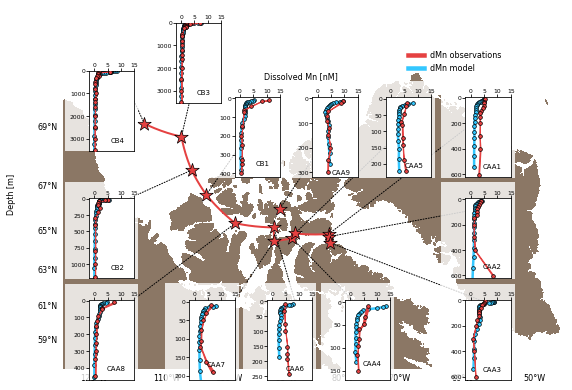

In [17]:
fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# profile plots:
ax1 = plt.axes([0.746, 0.55, 0.07, 0.15])
ax2 = plt.axes([0.746, 0.36, 0.07, 0.15]) #CAA1
ax3 = plt.axes([0.746, 0.17, 0.07, 0.15]) 
ax4 = plt.axes([0.56, 0.17, 0.07, 0.15])
ax5 = plt.axes([0.623, 0.55, 0.07, 0.15])
ax6 = plt.axes([0.44, 0.17, 0.07, 0.15]) 
ax7 = plt.axes([0.32, 0.17, 0.07, 0.15])
ax8 = plt.axes([0.165, 0.17, 0.07, 0.15])
ax9 = plt.axes([0.51, 0.55, 0.07, 0.15])
ax10 = plt.axes([0.39,  0.55, 0.07, 0.15]) #CB1
ax11 = plt.axes([0.165, 0.36, 0.07, 0.15])
ax12 = plt.axes([0.299,  0.69, 0.07, 0.15])
ax13 = plt.axes([0.165, 0.60, 0.07, 0.15])

axes_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]

for axi in axes_list:
    axi.tick_params(labelsize=6, pad=0)
    
fig1 = station_profile(ax1, dMn_CAA1, depth_CAA1, std_CAA1, 'CAA1', month, zoom=False)
fig2 = station_profile(ax2, dMn_CAA2, depth_CAA2, std_CAA2, 'CAA2', month, zoom=False)
fig3 = station_profile(ax3, dMn_CAA3, depth_CAA3, std_CAA3, 'CAA3', month, zoom=False)
fig4 = station_profile(ax4, dMn_CAA4, depth_CAA4, std_CAA4, 'CAA4', month, zoom=False)
fig5 = station_profile(ax5, dMn_CAA5, depth_CAA5, std_CAA5, 'CAA5', month, zoom=False)
fig6 = station_profile(ax6, dMn_CAA6, depth_CAA6, std_CAA6, 'CAA6', month, zoom=False)
fig7 = station_profile(ax7, dMn_CAA7, depth_CAA7, std_CAA7, 'CAA7', month, zoom=False)
fig8 = station_profile(ax8, dMn_CAA8, depth_CAA8, std_CAA8, 'CAA8', month, zoom=False)
fig9 = station_profile(ax9, dMn_CAA9, depth_CAA9, std_CAA9, 'CAA9', month, zoom=False)
fig10 = station_profile(ax10, dMn_CB1, depth_CB1, std_CB1, 'CB1', month, zoom=False)
fig11 = station_profile(ax11, dMn_CB2, depth_CB2, std_CB2, 'CB2', month, zoom=False)
fig12 = station_profile(ax12, dMn_CB3, depth_CB3, std_CB3, 'CB3', month, zoom=False)
fig13 = station_profile(ax13, dMn_CB4, depth_CB4, std_CB4, 'CB4', month, zoom=False)

x_GEOTRACES, y_GEOTRACES = proj(lons[5:18], lats[5:18]) # leave out BB and K stations
ax.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=200,zorder=5, edgecolor='k', linewidth=0.7, color=profile_colors[0])

xt, yt = proj(transect_vlons, transect_vlats)
proj.plot(xt, yt, c=profile_colors[0], linewidth=2, zorder=2)  

# create lines connecting the profiles:
coordsA = "data"
coordsB = "data"
for i in range(len(stn_names[5:18])):
    xy1 = (x_GEOTRACES[i], y_GEOTRACES[i])
    xy2 = (10, 50)#300/2)
    axB = axes_list[i]
    con = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax, axesB=axB, \
                          coordsA=coordsA, coordsB=coordsB, linestyle="dotted", linewidth=1.0, zorder=2)
    ax.add_artist(con)
    
    
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[0], label="dMn observations")
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[1], label="dMn model")
ax.set_frame_on(False)

ax.legend(loc=(0.68, 0.88), fontsize=8, frameon=False)

ax.text(1.8e6, 2.6e6, 'Dissolved Mn [nM]', fontsize=8)
ax.text(-0.5e6, 1.4e6, 'Depth [m]', fontsize=8, rotation=90)

figure = plt.gcf()
# figure.set_size_inches(4.5*1.5, 3.7*1.4)
figure.set_size_inches(4.5*2, 3.7*2)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R1-profile_evaluation-ref.png', \
#                bbox_inches='tight', dpi=300)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R1-profile_evaluation-ref.svg', \
#                bbox_inches='tight', dpi=300, format='svg')

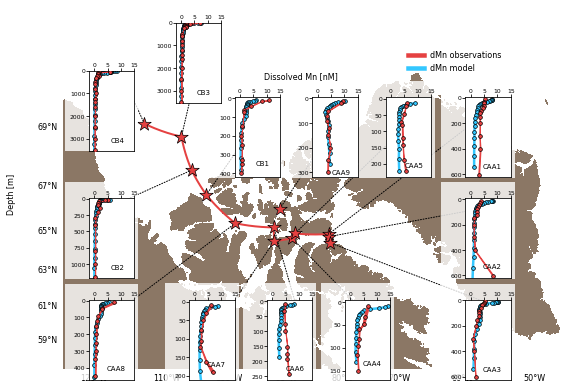

In [16]:
fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

# profile plots:
ax1 = plt.axes([0.746, 0.55, 0.07, 0.15])
ax2 = plt.axes([0.746, 0.36, 0.07, 0.15]) #CAA1
ax3 = plt.axes([0.746, 0.17, 0.07, 0.15]) 
ax4 = plt.axes([0.56, 0.17, 0.07, 0.15])
ax5 = plt.axes([0.623, 0.55, 0.07, 0.15])
ax6 = plt.axes([0.44, 0.17, 0.07, 0.15]) 
ax7 = plt.axes([0.32, 0.17, 0.07, 0.15])
ax8 = plt.axes([0.165, 0.17, 0.07, 0.15])
ax9 = plt.axes([0.51, 0.55, 0.07, 0.15])
ax10 = plt.axes([0.39,  0.55, 0.07, 0.15]) #CB1
ax11 = plt.axes([0.165, 0.36, 0.07, 0.15])
ax12 = plt.axes([0.299,  0.69, 0.07, 0.15])
ax13 = plt.axes([0.165, 0.60, 0.07, 0.15])

axes_list=[ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13]

for axi in axes_list:
    axi.tick_params(labelsize=6, pad=0)
    
fig1 = station_profile(ax1, dMn_CAA1, depth_CAA1, std_CAA1, 'CAA1', month, zoom=False)
fig2 = station_profile(ax2, dMn_CAA2, depth_CAA2, std_CAA2, 'CAA2', month, zoom=False)
fig3 = station_profile(ax3, dMn_CAA3, depth_CAA3, std_CAA3, 'CAA3', month, zoom=False)
fig4 = station_profile(ax4, dMn_CAA4, depth_CAA4, std_CAA4, 'CAA4', month, zoom=False)
fig5 = station_profile(ax5, dMn_CAA5, depth_CAA5, std_CAA5, 'CAA5', month, zoom=False)
fig6 = station_profile(ax6, dMn_CAA6, depth_CAA6, std_CAA6, 'CAA6', month, zoom=False)
fig7 = station_profile(ax7, dMn_CAA7, depth_CAA7, std_CAA7, 'CAA7', month, zoom=False)
fig8 = station_profile(ax8, dMn_CAA8, depth_CAA8, std_CAA8, 'CAA8', month, zoom=False)
fig9 = station_profile(ax9, dMn_CAA9, depth_CAA9, std_CAA9, 'CAA9', month, zoom=False)
fig10 = station_profile(ax10, dMn_CB1, depth_CB1, std_CB1, 'CB1', month, zoom=False)
fig11 = station_profile(ax11, dMn_CB2, depth_CB2, std_CB2, 'CB2', month, zoom=False)
fig12 = station_profile(ax12, dMn_CB3, depth_CB3, std_CB3, 'CB3', month, zoom=False)
fig13 = station_profile(ax13, dMn_CB4, depth_CB4, std_CB4, 'CB4', month, zoom=False)

x_GEOTRACES, y_GEOTRACES = proj(lons[5:18], lats[5:18]) # leave out BB and K stations
ax.scatter(x_GEOTRACES, y_GEOTRACES, marker='*',s=200,zorder=5, edgecolor='k', linewidth=0.7, color=profile_colors[0])

xt, yt = proj(transect_vlons, transect_vlats)
proj.plot(xt, yt, c=profile_colors[0], linewidth=2, zorder=2)  

# create lines connecting the profiles:
coordsA = "data"
coordsB = "data"
for i in range(len(stn_names[5:18])):
    xy1 = (x_GEOTRACES[i], y_GEOTRACES[i])
    xy2 = (10, 50)#300/2)
    axB = axes_list[i]
    con = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax, axesB=axB, \
                          coordsA=coordsA, coordsB=coordsB, linestyle="dotted", linewidth=1.0, zorder=2)
    ax.add_artist(con)
    
    
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[0], label="dMn observations")
ax.plot(0.8, 0.8, linewidth=4.5, color=profile_colors[1], label="dMn model")
ax.set_frame_on(False)

ax.legend(loc=(0.68, 0.88), fontsize=8, frameon=False)

ax.text(1.8e6, 2.6e6, 'Dissolved Mn [nM]', fontsize=8)
ax.text(-0.5e6, 1.4e6, 'Depth [m]', fontsize=8, rotation=90)

figure = plt.gcf()
# figure.set_size_inches(4.5*1.5, 3.7*1.4)
figure.set_size_inches(4.5*2, 3.7*2)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R1-profile_evaluation-ref.png', \
#                bbox_inches='tight', dpi=300)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R1-profile_evaluation-ref.svg', \
#                bbox_inches='tight', dpi=300, format='svg')

Load additional data:

In [17]:
Mn_model_cleanice = nc.Dataset(folder_cleanice+file)
Mn_model_spm      = nc.Dataset(folder_spm+file)
mn_dis_cleanice   = np.array(Mn_model_cleanice.variables['dissolmn'])
mn_dis_spm        = np.array(Mn_model_spm.variables['dissolmn'])

In [18]:
def calc_scatter(name, dmn_stn, depth_stn):
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);
    
    mn_ij_ref      = mn_dis_ref[8, 0, :, model_stni, model_stnj]*10**9
    mn_ij_cleanice = mn_dis_cleanice[8, 0, :, model_stni, model_stnj]*10**9
    mn_ij_spm      = mn_dis_spm[8, 0, :, model_stni, model_stnj]*10**9
    mn_ijref_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij_ref)
    mn_ijcleanice_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij_cleanice)
    mn_ijspm_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij_spm)
    
    m1 = []; m2 = []; m3 = [];
    for depth_obs in depth_stn[(depth_stn < 50) & (depth_stn > 5)]:
        d1 = np.argmin(np.abs(depths_model-depth_obs))
        m1.append(mn_ijref_masked[d1])
        m2.append(mn_ijcleanice_masked[d1])
        m3.append(mn_ijspm_masked[d1])
    
    dmn_m1  = m1; dmn_m2  = m2; dmn_m3  = m3
    dmn_obs = list(dmn_stn[(depth_stn < 50) & (depth_stn > 5)])
    
    return dmn_m1, dmn_m2, dmn_m3, dmn_obs

In [19]:
dmn_ref_CAA1, dmn_cleanice_CAA1, dmn_spm_CAA1, dmn_ob_CAA1 = calc_scatter('CAA1', dMn_CAA1, depth_CAA1)
dmn_ref_CAA2, dmn_cleanice_CAA2, dmn_spm_CAA2, dmn_ob_CAA2 = calc_scatter('CAA2', dMn_CAA2, depth_CAA2)
dmn_ref_CAA3, dmn_cleanice_CAA3, dmn_spm_CAA3, dmn_ob_CAA3 = calc_scatter('CAA3', dMn_CAA3, depth_CAA3)
dmn_ref_CAA4, dmn_cleanice_CAA4, dmn_spm_CAA4, dmn_ob_CAA4 = calc_scatter('CAA4', dMn_CAA4, depth_CAA4)
dmn_ref_CAA5, dmn_cleanice_CAA5, dmn_spm_CAA5, dmn_ob_CAA5 = calc_scatter('CAA5', dMn_CAA5, depth_CAA5)
dmn_ref_CAA6, dmn_cleanice_CAA6, dmn_spm_CAA6, dmn_ob_CAA6 = calc_scatter('CAA6', dMn_CAA6, depth_CAA6)
dmn_ref_CAA7, dmn_cleanice_CAA7, dmn_spm_CAA7, dmn_ob_CAA7 = calc_scatter('CAA7', dMn_CAA7, depth_CAA7)
dmn_ref_CAA8, dmn_cleanice_CAA8, dmn_spm_CAA8, dmn_ob_CAA8 = calc_scatter('CAA8', dMn_CAA8, depth_CAA8)
dmn_ref_CAA9, dmn_cleanice_CAA9, dmn_spm_CAA9, dmn_ob_CAA9 = calc_scatter('CAA9', dMn_CAA9, depth_CAA9)

dmn_ref_CB1, dmn_cleanice_CB1, dmn_spm_CB1, dmn_ob_CB1 = calc_scatter('CB1', dMn_CB1, depth_CB1)
dmn_ref_CB2, dmn_cleanice_CB2, dmn_spm_CB2, dmn_ob_CB2 = calc_scatter('CB2', dMn_CB2, depth_CB2)
dmn_ref_CB3, dmn_cleanice_CB3, dmn_spm_CB3, dmn_ob_CB3 = calc_scatter('CB3', dMn_CB3, depth_CB3)
dmn_ref_CB4, dmn_cleanice_CB4, dmn_spm_CB4, dmn_ob_CB4 = calc_scatter('CB4', dMn_CB4, depth_CB4)

In [20]:
dmn_dirty = dmn_ref_CAA1 + dmn_ref_CAA2 + dmn_ref_CAA3 + dmn_ref_CAA4 + dmn_ref_CAA5 + \
            dmn_ref_CAA6 + dmn_ref_CAA7 + dmn_ref_CAA8 + dmn_ref_CAA9 + dmn_ref_CB1 + \
            dmn_ref_CB2  + dmn_ref_CB3  + dmn_ref_CB4
dmn_dirty_CB = dmn_ref_CB1 + dmn_ref_CB2  + dmn_ref_CB3  + dmn_ref_CB4

dmn_clean = dmn_cleanice_CAA1 + dmn_cleanice_CAA2 + dmn_cleanice_CAA3 + dmn_cleanice_CAA4 + dmn_cleanice_CAA5 + \
            dmn_cleanice_CAA6 + dmn_cleanice_CAA7 + dmn_cleanice_CAA8 + dmn_cleanice_CAA9 + dmn_cleanice_CB1 + \
            dmn_cleanice_CB2  + dmn_cleanice_CB3  + dmn_cleanice_CB4
dmn_clean_CB = dmn_cleanice_CB1 + dmn_cleanice_CB2  + dmn_cleanice_CB3  + dmn_cleanice_CB4

dmn_rivers = dmn_spm_CAA1 + dmn_spm_CAA2 + dmn_spm_CAA3 + dmn_spm_CAA4 + dmn_spm_CAA5 + \
            dmn_spm_CAA6 + dmn_spm_CAA7 + dmn_spm_CAA8 + dmn_spm_CAA9 + dmn_spm_CB1 + \
            dmn_spm_CB2  + dmn_spm_CB3  + dmn_spm_CB4
dmn_rivers_CB = dmn_spm_CB1 + dmn_spm_CB2  + dmn_spm_CB3  + dmn_spm_CB4

dmn_observ = dmn_ob_CAA1 + dmn_ob_CAA2 + dmn_ob_CAA3 + dmn_ob_CAA4 + dmn_ob_CAA5 + \
             dmn_ob_CAA6 + dmn_ob_CAA7 + dmn_ob_CAA8 + dmn_ob_CAA9 + dmn_ob_CB1 + \
             dmn_ob_CB2  + dmn_ob_CB3  + dmn_ob_CB4
dmn_observ_CB = dmn_ob_CB1 + dmn_ob_CB2  + dmn_ob_CB3  + dmn_ob_CB4

delta_dmn_ice         = np.array(dmn_dirty)  - np.array(dmn_clean)
delta_dmn_rivers      = np.array(dmn_rivers) - np.array(dmn_dirty)
dmn_clean_rivers      = np.array(dmn_rivers) - delta_dmn_ice

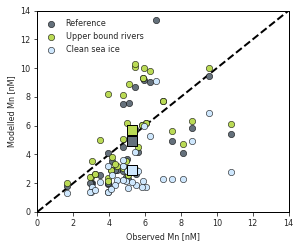

In [21]:
fig = plt.figure(figsize=(6,5))
st  = sns.axes_style("ticks")

# Colors:
rivers = '#bada55'
dirty  = '#64707b'
clean  = '#cee7fd'

with st:
    ax = sns.lineplot([0, 20],[0, 20], c='k', linewidth=2.0, zorder=1)
    ax.lines[0].set_linestyle('--')
    
    sns.scatterplot(dmn_observ, dmn_dirty , label=r'Reference', s=40, edgecolor='k', color=dirty, zorder=2)
    sns.scatterplot(dmn_observ, dmn_rivers, label=r'Upper bound rivers', s=40, edgecolor='k', color=rivers, zorder=2)
    sns.scatterplot(dmn_observ, dmn_clean , label=r'Clean sea ice' , s=40, edgecolor='k', color=clean, zorder=2)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_rivers)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=rivers, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_dirty)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=dirty, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_clean)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=clean, zorder=3)

    ax.set_xlabel('Observed Mn [nM]', fontsize=8)
    ax.set_ylabel('Modelled Mn [nM]',fontsize=8)
    ax.set(xlim=(0, 14.), ylim=(0, 14.))
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc=(0.01, 0.77), frameon=False, fontsize=8)
    
    ax.spines['left'].set_linewidth(1.0);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.0); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.0);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.0);    ax.spines['top'].set_color('black');    
    
figure = plt.gcf()
figure.set_size_inches(4.5, 3.7)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations.png', \
               bbox_inches='tight', dpi=300, transparent=True)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations.svg', \
               bbox_inches='tight', dpi=300, format='svg')

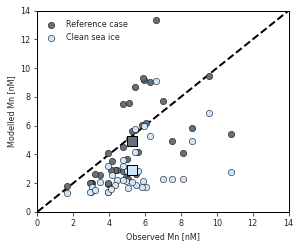

In [22]:
fig = plt.figure(figsize=(6,5))
st  = sns.axes_style("ticks")

# Colors:
rivers = '#bada55'
dirty  = '#64707b'
clean  = '#cee7fd'

with st:
    ax = sns.lineplot([0, 20],[0, 20], c='k', linewidth=2.0, zorder=1)
    ax.lines[0].set_linestyle('--')
    
#     sns.scatterplot(dmn_observ, dmn_rivers, label=r'Upper bound rivers', s=40, edgecolor='k', color=rivers, zorder=2)
    sns.scatterplot(dmn_observ, dmn_dirty , label=r'Reference case', s=40, edgecolor='k', color=dirty, zorder=2)
    sns.scatterplot(dmn_observ, dmn_clean , label=r'Clean sea ice' , s=40, edgecolor='k', color=clean, zorder=2)
#     sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_rivers)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=rivers, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_dirty)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=dirty, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_clean)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=clean, zorder=3)

    ax.set_xlabel('Observed Mn [nM]', fontsize=8)
    ax.set_ylabel('Modelled Mn [nM]',fontsize=8)
    ax.set(xlim=(0, 14.), ylim=(0, 14.))
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc=(0.01, 0.83), frameon=False, fontsize=8)
    
    ax.spines['left'].set_linewidth(1.0);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.0); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.0);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.0);    ax.spines['top'].set_color('black');    
    
figure = plt.gcf()
figure.set_size_inches(4.5, 3.7)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations-a.png', \
               bbox_inches='tight', dpi=300, transparent=True)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations-a.svg', \
               bbox_inches='tight', dpi=300, format='svg')

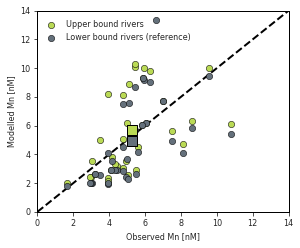

In [23]:
fig = plt.figure(figsize=(6,5))
st  = sns.axes_style("ticks")

# Colors:
rivers = '#bada55'
dirty  = '#64707b'
clean  = '#cee7fd'

with st:
    ax = sns.lineplot([0, 20],[0, 20], c='k', linewidth=2.0, zorder=1)
    ax.lines[0].set_linestyle('--')
    
    sns.scatterplot(dmn_observ, dmn_rivers, label=r'Upper bound rivers', s=40, edgecolor='k', color=rivers, zorder=2)
    sns.scatterplot(dmn_observ, dmn_dirty , label=r'Lower bound rivers (reference)', s=40, edgecolor='k', color=dirty, zorder=2)
#     sns.scatterplot(dmn_observ, dmn_clean , label=r'Clean sea ice' , s=40, edgecolor='k', color=clean, zorder=2)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_rivers)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=rivers, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_dirty)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=dirty, zorder=3)
#     sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_clean)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=clean, zorder=3)

    ax.set_xlabel('Observed Mn [nM]', fontsize=8)
    ax.set_ylabel('Modelled Mn [nM]',fontsize=8)
    ax.set(xlim=(0, 14.), ylim=(0, 14.))
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc=(0.01, 0.83), frameon=False, fontsize=8)
    
    ax.spines['left'].set_linewidth(1.0);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.0); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.0);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.0);    ax.spines['top'].set_color('black');    
    
figure = plt.gcf()
figure.set_size_inches(4.5, 3.7)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations-b.png', \
               bbox_inches='tight', dpi=300, transparent=True)
figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/R3-model-vs-observations-b.svg', \
               bbox_inches='tight', dpi=300, format='svg')